In [2]:
from tools import *
import random

#   BL（bottom-up left-justified）法求解二位装箱问题
#   @BetterBench
#   思想：首先将选中的物体放在箱子的右上角，然后尽量向下向左作连续移动，直到不能移动为止
# 输入参数
itemNum=30 #物品数目
AllItem=np.array([[random.randint(1, 5) for j in range(1, 3)] for i in range(1,itemNum+1)])  #随机生成30个物品，[width,height]
Bin=[10,10] #箱子宽度与高度
ran=list(range(itemNum))
random.shuffle(ran) #随机生成装箱序列

ansBXY=np.zeros((itemNum,3))  #[箱子编号，X坐标，Y坐标]
RPNXY=[];
BinNum=1;
flagItem=np.zeros(itemNum) #标记物品是否被装入箱子，0没有装入，1装入
# 开始装箱

for i in range(itemNum):
    if flagItem[ran[i]]==0:
        item=AllItem[ran[i],:]
        itemRP=Bin  #起点全部在箱子右上角顶点
        flagOL=overlap(item,AllItem,itemRP,RPNXY) #如果重合flagOL=1；反之flagOL=0
        if flagOL==0:
            itemRP=finalPos(item,AllItem,itemRP,RPNXY) #更新物品从当前位置向下向左移动后到最终位置后右上角顶点坐标
            RPNXY.append([ran[i],itemRP[0],itemRP[1]]) # 记录装进箱子的矩形【ID,width,height】
            flagItem[ran[i]]=1
# 启用第下一个箱子
# if list(flagItem).count(0)>0:
#     BinNum=BinNum+1
#     RPNXY=[]

In [3]:
AllItem

array([[2, 4],
       [2, 5],
       [5, 4],
       [1, 1],
       [1, 3],
       [5, 1],
       [4, 3],
       [5, 4],
       [3, 2],
       [2, 1],
       [4, 1],
       [5, 5],
       [1, 3],
       [5, 1],
       [1, 1],
       [5, 1],
       [5, 5],
       [3, 1],
       [4, 4],
       [5, 4],
       [3, 3],
       [4, 2],
       [3, 1],
       [3, 4],
       [5, 1],
       [5, 4],
       [2, 5],
       [5, 1],
       [1, 3],
       [2, 5]])

In [4]:
flagItem

array([0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [20]:
# 右上角定点坐标
RPNXY

[[3, 2, 3], [2, 5, 3], [8, 3, 4], [5, 4, 5]]

In [4]:
AllItem

array([[1, 3],
       [5, 5],
       [1, 3],
       [3, 5],
       [2, 3],
       [2, 1],
       [3, 3],
       [5, 3],
       [3, 1],
       [4, 3]])

# 2 计算利用率

In [5]:
rect_area = 0
bin_area = Bin[0]*Bin[1]
for id in RPNXY:
  width,height = AllItem[id[0]]
  rect_area += width*height
print('利用率:{}'.format(rect_area/bin_area))

利用率:0.81


# 3 可视化

<ipython-input-7-15d4e35982d4>:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "kpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('result.png',kpi=300)


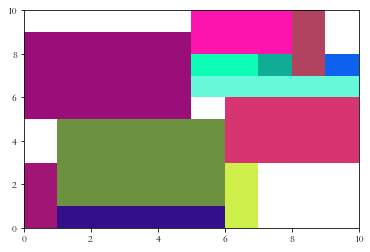

In [7]:


import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
fig, ax = plt.subplots(1, 1)
ax1 = fig.gca()
for i in RPNXY:
    width,height = AllItem[i[0]]
    rx,ry = i[1],i[2]
    lx,ly = rx-width,ry-height
    plt.xlim((0, Bin[0]))
    plt.ylim((0, Bin[1]))
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    rect = patches.Rectangle((lx, ly), width,height,linewidth=1, facecolor = color)
    ax1.add_patch(rect)
# plt.show()
plt.savefig('result.png',kpi=300)